## Holistic AI x UCL AI Society Hackathon Tutorial

### Track 1: Multi-Objective Optimization for AI Trustworthiness in Tabular Data Classification

This track challenges participants to develop trustworthy AI systems for tabular data classification by optimizing not only **performance** and **fairness** but also key risk dimensions: **security**, **efficacy**, **explainability**, and **sustainability**. By leveraging the **HolisticAI open-source library** or or custom-defined metrics and mitigation strategies, participants will seamlessly incorporate ethical and practical AI principles into their models.

#### Objectives:
- **Fairness**: Detect and mitigate biases to ensure equitable outcomes across demographic groups.
- **Performance**: Maintain high accuracy.
- **Security and Privacy**: Address risks such as adversarial attacks.
- **Efficacy and Robustness**: Build models that generalize effectively under varied scenarios.
- **Explainability and Transparency**: Provide clear, interpretable insights into model decision-making using techniques like XAI evaluation.
- **Sustainability**: Reduce carbon footprint and optimize computational resources.

#### Tutorial and Resources:
Participants can explore practical examples and comprehensive documentation of the HolisticAI library:

[HolisticAI Library Tutorial](https://holisticai.readthedocs.io/en/latest/gallery/index.html)

<h1 align="center">
<img src="https://static.propublica.org/projects/algorithmic-bias/assets/img/generated/opener-b-crop-1200*675-00796e.jpg" width="400">
<br>Study Case: The COMPAS Dataset
<h4 align="center">Technical Risks in Machine Learning Models</h2>
</h1>


The COMPAS dataset is a dataset that includes criminal records and demographic information of individuals assessed by the [COMPAS (Correctional Offender Management Profiling for Alternative Sanctions)](https://doc.wi.gov/Pages/AboutDOC/COMPAS.aspx) risk assessment tool. The data contains information on individuals' criminal history, recidivism, and demographic attributes, which has been widely analyzed to evaluate the fairness and accuracy of risk assessments. This dataset has been utilized in studies focused on bias detection and mitigation in machine learning, especially regarding racial biases in predictive policing.

**(Goal)** The primary goal of working with the COMPAS dataset is to evaluate and mitigate potential biases within predictive models used for assessing recidivism risk. By analyzing the dataset, the aim is to determine whether the model’s predictions are influenced by sensitive attributes like race, gender, and age, and to develop techniques to promote fairness. This includes the exploration of various bias mitigation algorithms, such as pre-processing, in-processing, and post-processing approaches, with a particular emphasis on maintaining predictive accuracy while enhancing the equity of model outcomes.

**(Features)** The following table presents the 16 features of Compas dataset, including the target variable  "two_year_recid".


| Feature                  | Description                                                                                      |
|--------------------------|--------------------------------------------------------------------------------------------------|
| `age`                    | Age of the individual at the time of the assessment.                                             |
| `c_charge_degree`        | Degree of the charge (e.g., 'M' for misdemeanor, 'F' for felony).                                |
| `race`                   | Race of the individual (e.g., African-American, Caucasian).                                      |
| `age_cat`                | Categorical age group (e.g., 'Less than 25', '25 - 45', 'Greater than 45').                      |
| `score_text`             | Risk level as categorized by COMPAS (e.g., 'Low', 'Medium', 'High').                             |
| `sex`                    | Gender of the individual (e.g., Male, Female).                                                   |
| `priors_count`           | Number of prior offenses committed by the individual.                                            |
| `days_b_screening_arrest`| Days between arrest and screening date.                                                          |
| `decile_score`           | COMPAS risk score on a scale from 1 to 10.                                                       |
| `juv_fel_count`          | Count of juvenile felony offenses.                                                               |
| `juv_misd_count`         | Count of juvenile misdemeanor offenses.                                                          |
| `juv_other_count`        | Count of other juvenile offenses.                                                                |
| `v_type_of_assessment`   | Type of assessment for violent recidivism risk (e.g., 'Risk of Violence').                      |
| `c_days_from_compas`     | Days since the COMPAS assessment was completed.                                                  |
| `v_score_text`           | Categorical violent risk level as assessed by COMPAS (e.g., 'Low', 'Medium', 'High').           |
| `v_decile_score`         | COMPAS decile score specific to violent recidivism risk.                                         |
| `(target) two_year_recid`      | Binary indicator of whether the individual was rearrested within two years of the screening date.     |


## Setup and Dependencies
Install the necessary libraries to get started:

In [1]:
pip install holisticai scikit-learn pandas numpy matplotlib seaborn jax -q

Note: you may need to restart the kernel to use updated packages.


### Load Dataset

In [2]:
from holisticai.datasets import load_dataset

dataset = load_dataset("compas_two_year_recid", protected_attribute="sex")
split_dataset = dataset.train_test_split(test_size=0.2, random_state=42)
train = split_dataset['train']
test = split_dataset['test']

In [52]:
test

{"dtype":"Dataset","attributes":{"Instances":1235,"Features":["X , y , p_attrs , group_a , group_b"]},"metadata":"sex: {'group_a': 'Male', 'group_b': 'Female'}"}

## 1. Train a Binary Classification Model

In [3]:
from sklearn.ensemble import RandomForestClassifier
from holisticai.utils import BinaryClassificationProxy

model = RandomForestClassifier(random_state=42)

model.fit(train['X'], train['y'])

proxy = BinaryClassificationProxy(predict=model.predict, predict_proba=model.predict_proba)

## 2. Measuring Efficacy

Efficacy metrics are used to evaluate the performance of a model by quantifying how accurately it makes predictions.

## a) Accuracy

**Accuracy** is a metric that measures the proportion of correct predictions made by a classification model out of the total predictions. It is a commonly used metric for model evaluation, especially when the classes are balanced.

### Formula

Accuracy is defined as:

$$
\text{Accuracy} = \frac{\text{True Positives} + \text{True Negatives}}{\text{Total Predictions}}
$$

where:
- **True Positives (TP)**: Correct positive predictions.
- **True Negatives (TN)**: Correct negative predictions.
- **Total Predictions** $= \text{True Positives} + \text{True Negatives} + \text{False Positives} + \text{False Negatives}$.

### Interpretation

- **Accuracy = 1**: The model predicts all outcomes correctly.
- **Accuracy < 1**: The model has some incorrect predictions.

Accuracy is useful when the class distribution is balanced. However, it can be misleading if the data is imbalanced, as it does no


In [4]:
from sklearn.metrics import accuracy_score

y_test_pred = proxy.predict(test['X'])
accuracy_score(test['y'], y_test_pred)

0.654251012145749

## b) F1 Score

The **F1 Score** is a metric that combines both precision and recall into a single score. It is especially useful for evaluating the performance of a classification model when there is an imbalance in the class distribution, as it balances the trade-off between false positives and false negatives.

### Formula

The F1 Score is the harmonic mean of precision and recall and is defined as:

$$
F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

where:
- **Precision**: The ratio of correctly predicted positive observations to total predicted positives.

  $$
  \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
  $$

- **Recall**: The ratio of correctly predicted positive observations to all actual positives.

  $$
  \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
  $$

### Interpretation

- **F1 Score = 1**: Perfect precision and recall.
- **F1 Score = 0**: Model fails to identify any true positives.
  
A higher F1 Score indicates better

In [5]:
from sklearn.metrics import f1_score

f1_score(test['y'], y_test_pred)

np.float64(0.5975494816211122)

What other efficacy metrics do we have for binary classification? Holistic AI library allows you to perform a practical inspection of the metrics by calling ```classification_efficacy_metrics```:

In [6]:
from holisticai.efficacy.metrics import classification_efficacy_metrics

classification_efficacy_metrics(test['y'], y_test_pred)

,Value,Reference
Metric,,
Accuracy,0.654251,1
Balanced Accuracy,0.646581,1
Precision,0.622790,1
Recall,0.574275,1
F1-Score,0.597549,1


# 2. Measuring Bias

In machine learning fairness, Equal Opportunity and Equal Outcomes are distinct concepts:

- **Equal Opportunity**: Ensures individuals with similar qualifications have equal chances of positive outcomes, focusing on equal true positive rates across groups.

- **Equal Outcomes**: Aims for equal proportions of positive results among different demographic groups, regardless of individual qualifications.

## a) Disparate Impact

**Disparate Impact** is a fairness metric used to measure the relative rate of favorable outcomes between an unprivileged group and a privileged group. It is commonly used to assess whether a model’s predictions disproportionately favor one group over another. A value close to 1 indicates fairness, while values significantly above or below 1 indicate potential bias.

### Formula

$$
\text{Disparate Impact} = \frac{P(\text{positive outcome | unprivileged})}{P(\text{positive outcome | privileged})}
$$

where:
- $P(\text{positive outcome | unprivileged})$ is the probability of a positive outcome for the unprivileged group.
- $P(\text{positive outcome | privileged})$ is the probability of a positive outcome for the privileged group.


### Interpretation

- **Disparate Impact ≈ 1**: The model is fair (similar outcomes for both groups).
- **< 1**: The privileged group has a higher rate of positive outcomes.
- **> 1**: The unprivileged group has a higher rate of positive outcomes.

In practice, a common threshold for fairness is that **Disparate Impact should be between 0.8 and 1.25**. If the metric falls outside this range, the model may be considered biased.

In [7]:
from holisticai.bias.metrics import disparate_impact

disparate_impact(test['group_a'], test['group_b'], y_test_pred)

np.float64(1.4867691532258067)

## b) Equal Opportunity Difference

The **Equal Opportunity Difference** is a fairness metric that measures the difference in true positive rates (TPR) between privileged and unprivileged groups in a classification model. Ideally, this difference should be close to zero to ensure fairness.

### Formula

$$
\text{Equal Opportunity Difference} = TPR_{privileged} - TPR_{unprivileged}
$$

### Interpretation

- **0**: The model is fair (Equal Opportunity).
- **Positive**: The privileged group has a higher chance of a positive prediction.
- **Negative**: The unprivileged group has a higher chance of a positive prediction.

In [8]:
from holisticai.bias.metrics import equal_opportunity_diff

equal_opportunity_diff(test['group_a'], test['group_b'], y_test_pred, test['y'])

np.float64(0.17446544778431977)

You can access all bias metrics for binary classification available in the HolisticAI library using the ```classification_bias_metrics``` function.

In [9]:
from holisticai.bias.metrics import classification_bias_metrics

classification_bias_metrics(test['group_a'], test['group_b'], y_test_pred, test['y'])

,Value,Reference
Metric,,
Statistical Parity,0.144228,0
Disparate Impact,1.486769,1
Four Fifths Rule,0.672599,1
Cohen D,0.295011,0
2SD Rule,4.093686,0
Equality of Opportunity Difference,0.174465,0
False Positive Rate Difference,0.082330,0
Average Odds Difference,0.128398,0
Accuracy Difference,0.005036,0


# Measuring Explainability

Model interpretability can be quantified through various criteria that assess how understandable a model is, as well as through transparent surrogate models that aim to represent the actual model and its decision-making process. Some criteria include:

- **Concentration of Feature Importance**: Evaluating how feature importance is distributed across the model.

- **Consistency of Feature Importance Ranking**: Assessing the stability of feature importance rankings across different decision groups within the model, such as classes 0 and 1 in binary classification.

- **Stability of Feature Importance Across the Dataset**: Analyzing how feature importance varies throughout the dataset.

- **Complexity of Feature Relationships**: Examining the complexity of the relationship between features and their partial dependence plots.

Another approach to quantifying interpretability is to evaluate how effectively a transparent model fits the actual model. For instance, if the surrogate model is a decision tree, additional measures such as tree depth or the number of features used by the transparent model can be considered.

In this tutorial, we will calculate certain model features that will assist in evaluating interpretability metrics.

In [10]:
from holisticai.inspection import compute_permutation_importance
from holisticai.utils.surrogate_models import create_surrogate_model
from holisticai.inspection import compute_partial_dependence
from holisticai.inspection import compute_conditional_permutation_importance


# Feature Importance
importance = compute_permutation_importance(proxy, X=train['X'], y=train['y'])
top_importance = importance.top_alpha()
top_feature_names = top_importance.feature_names

# Conditional Feature Importance
conditional_impotance = compute_conditional_permutation_importance(proxy, X=test['X'], y=test['y'])

# Partial Dependence
X_sample = test['X'].sample(1000)
partial_dependence = compute_partial_dependence(features=top_feature_names, proxy=proxy, X=X_sample)

# Surrogate Model
surrogate_model = create_surrogate_model(X=train['X'], y_pred=train['y'], surrogate_type='tree', learning_task='classification')

Measuring Alpha  Score that represents the percentage of features that represent the 80% of importnaces in the model behaivours. A lower value points that we can explain the model decision with few features.

In [11]:
from holisticai.explainability.metrics.global_feature_importance import alpha_score

alpha_score(importance)

0.4

Measuring Fluctuation Ratio points the percentage in the PDP curve that present fluctuation in the model prediction.

In [12]:
    from holisticai.explainability.metrics.global_feature_importance import fluctuation_ratio

    fluctuation_ratio(partial_dependence)

0.0682075

Rank Alignment estimates the percentage of features that remain aligned at the top of importances for label 0 and label 1

In [13]:
from holisticai.explainability.metrics.global_feature_importance import rank_alignment

rank_alignment(conditional_impotance, top_importance)

0.37662337662337664

Global Feature Importance Based Metrics

In [14]:
from holisticai.explainability.metrics import classification_global_feature_importance_explainability_metrics

classification_global_feature_importance_explainability_metrics(partial_dependence, importance, conditional_impotance)

,Value,Reference
Spread Divergence,0.458074,1
Fluctuation Ratio,0.068208,0
Rank Alignment,0.487179,1
Alpha Score,0.4,0


Tree based Metrics

In [15]:
from holisticai.explainability.metrics import tree_explainability_metrics

tree_explainability_metrics(surrogate_model)

,value,reference
metric,,
Weighted Average Depth,15.647471,0.0
Weighted Average Explainability Score,11.160675,0.0
Weighted Gini Index,0.702258,0.0
Tree Depth Variance,23.499934,0.0
Number of Rules,1343.000000,1.0
Number of Features,18.000000,1.0


Surrogate Based Metrics

In [16]:
from holisticai.explainability.metrics import classification_surrogate_explainability_metrics

y_pred = proxy.predict(test['X'])
classification_surrogate_explainability_metrics(test['X'], test['y'], y_pred, surrogate_model)

,Value,Reference
Accuracy Degradation,0.070468,0
Surrogate Fidelity,0.8,1
Surrogate Feature Stability,0.925731,1


# Measuring Security

Security metrics in machine learning evaluate the robustness and resilience of models against threats to data privacy, model integrity, and information leakage. They provide insight into how susceptible a model is to various risks and guide strategies to safeguard sensitive information and maintain reliable performance.

Here’s a brief description of each type of security metric in the library:

- **SHAPR**: This metric assesses membership privacy risk by estimating how much individual training data points influence model predictions. By using Shapley values, SHAPR quantifies the likelihood of data memorization, which can reveal vulnerabilities to membership inference attacks.

- **Data Minimizer**: Similar to feature selection methods, Data Minimizer evaluates the model’s performance as features are iteratively removed. By identifying features that have minimal impact on model accuracy, it highlights areas where data minimization can improve privacy without sacrificing effectiveness.

- **Privacy Risk Score**: This metric quantifies the likelihood that a specific input sample originates from the model's training set, based on the model's responses to that sample. Privacy Risk Score helps to identify which samples present the highest risk to be classified as training data, or in general, how risky is the model in terms of data privacy with respect to our training data.

In [17]:
from holisticai.security.metrics import shapr_score

y_pred_train = proxy.predict(train['X'])
y_pred_test = proxy.predict(test['X'])

shapr_score(train['y'], test['y'], y_pred_train, y_pred_test, train_size=0.4)

array([[ 1.5082951e-01,  1.5082951e-01,  1.5082951e-01, ...,
         8.0971658e-04,  8.0971658e-04,  8.0971658e-04],
       [ 8.3822054e-01, -7.6016003e-01,  3.9030310e-02, ...,
         8.0971658e-04,  8.0971658e-04,  8.0971658e-04],
       [ 8.3822054e-01, -7.6016003e-01,  3.9030310e-02, ...,
         8.0971658e-04,  8.0971658e-04,  8.0971658e-04],
       ...,
       [ 1.5082951e-01,  1.5082951e-01,  1.5082951e-01, ...,
         8.0971658e-04,  8.0971658e-04,  8.0971658e-04],
       [-8.3741087e-01,  7.6096970e-01, -3.8220592e-02, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 1.5082951e-01,  1.5082951e-01,  1.5082951e-01, ...,
         8.0971658e-04,  8.0971658e-04,  8.0971658e-04]], dtype=float32)

In [18]:
from holisticai.security.commons import DataMinimizer
from holisticai.security.metrics import data_minimization_score

dmin = DataMinimizer(proxy=proxy, selector_types=["Percentile", "Variance"])
dmin.fit(train['X'], train['y'])

y_pred_test = proxy.predict(test['X'])
y_pred_test_dm = dmin.predict(test['X'])


data_minimization_score(test['y'], y_pred_test, y_pred_test_dm)

/Users/rishi/Documents/holistic-hack/holistic-hack/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [16] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/rishi/Documents/holistic-hack/holistic-hack/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/rishi/Documents/holistic-hack/holistic-hack/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [16] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/rishi/Documents/holistic-hack/holistic-hack/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


0.9914110429447852

In [19]:
from holisticai.security.metrics import privacy_risk_score

target_shadow = train.train_test_split(test_size=0.4, random_state=42)

X_shadow_train = target_shadow['test']['X']
y_shadow_train = target_shadow['test']['y']

shadow_model = RandomForestClassifier(random_state=42)
shadow_model.fit(X_shadow_train, y_shadow_train)

shadow_train_probs = shadow_model.predict_proba(X_shadow_train)
shadow_test_probs = shadow_model.predict_proba(test['X'])
target_train_probs = proxy.predict_proba(train['X'])
target_test_probs = proxy.predict_proba(test['X'])

risk_score_train = privacy_risk_score((shadow_train_probs, y_shadow_train), (shadow_test_probs, test['y']), (target_train_probs, train['y']))
print("Mean Privacy Risk Score for train: ", risk_score_train.mean())

Mean Privacy Risk Score for train:  0.524116814658795


Given that this metric estimates an individual sample’s probability of being in the target model’s training set. By calculating the mean Privacy Risk Score across all samples, we can obtain a global measure of the model’s privacy risk. In an ideal scenario, the Privacy Risk Score should be close to 0, indicating a low risk of data memorization, while higher values suggest potential vulnerabilities to membership inference attacks.

# Measuring Robustness

Robustness metrics are measures used to evaluate how well machine learning models maintain performance under varying conditions, such as data shifts, adversarial inputs, or environmental changes. These metrics help assess a model’s resilience and reliability in real-world applications.


Accuracy Degradation Factor (ADF) is a robustness metric that detects the first point of significant accuracy drop as a dataset is gradually reduced, allowing for the prediction of performance shifts due to changing data distributions. Here is an exampel how to use the metric:

In [20]:
from holisticai.robustness.metrics import (
    accuracy_degradation_profile,
    accuracy_degradation_factor,
)
import pandas as pd

results = accuracy_degradation_profile(test['X'], 
                                    test['y'], 
                                    y_test_pred, 
                                    n_neighbors = 50,
                                    step_size = 0.02,
                                    )
accuracy_degradation_factor(pd.DataFrame(results.data))

/Users/rishi/Documents/holistic-hack/holistic-hack/lib/python3.12/site-packages/holisticai/robustness/metrics/dataset_shift/_accuracy_degradation_profile.py:526: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_summary_df = pd.concat([results_summary_df, new_row], ignore_index=True)


0.78

## Extra Example: Bias-Accuracy Tradeoff

In [21]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style("whitegrid")

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from holisticai.bias.metrics import equal_opportunity_diff, statistical_parity, disparate_impact
from sklearn.metrics import accuracy_score

In [22]:
class BaseMetric:
    # BaseMetric class with typical inputs
    def __init__(self, model, train, test):
        self.model = model
        self.train = train
        self.test = test


# EDIT THIS to include more metrics
class MyCustomMetric(BaseMetric):
    best_value = 0
    # You can define your own custom metric to be optimized                
    def compute(self):
        y_pred = self.model.predict(self.test['X'])
        acc = accuracy_score(self.test['y'], y_pred)
        di = disparate_impact(self.test['group_a'], self.test['group_b'], y_pred)
        sp = statistical_parity(self.test['group_a'], self.test['group_b'])
    



        error_accuracy = 1 - acc # min value: 0
        error_bias = abs(1-di) # min value: 0
        error  = error_accuracy + error_bias
        return error

class EqualOpportunity(BaseMetric):
    best_value = 0
    def compute(self):
        y_pred = self.model.predict(self.test['X'])
        eo = equal_opportunity_diff1(self.test['group_a'], self.test['group_b'], y_pred, self.test['y'])
        return eo

class Accuracy(BaseMetric):
    best_value = 1
    def compute(self):
        y_pred = self.model.predict(self.test['X'])
        eo = accuracy_score(self.test['y'], y_pred)
        return eo

class DisparateImpact(BaseMetric):
    best_value = 1
    def compute(self):
        y_pred = self.model.predict(self.test['X'])
        di = disparate_impact(self.test['group_a'], self.test['group_b'], y_pred)
        return di

In [23]:
from typing import Callable
from tqdm import tqdm

class MultiObjetiveOptimizer:
    models = {
        'LR_l2': LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42),
        'LR_l1': LogisticRegression(penalty='l1', C=1.0, solver='liblinear', random_state=42),
        'RF_50': RandomForestClassifier(n_estimators=50, random_state=42),
        'RF_100': RandomForestClassifier(n_estimators=100, random_state=42),
        'RF_150': RandomForestClassifier(n_estimators=150, random_state=42),
        'DT_5': DecisionTreeClassifier(max_depth=5, random_state=42),
        'DT_10': DecisionTreeClassifier(max_depth=10, random_state=42),
        'DT_15': DecisionTreeClassifier(max_depth=15, random_state=42),
        'MLP_50': MLPClassifier(hidden_layer_sizes=(50,), random_state=42, activation='logistic'),
        'MLP_100': MLPClassifier(hidden_layer_sizes=(100,), random_state=42, activation='logistic'),
        'MLP_150': MLPClassifier(hidden_layer_sizes=(150,), random_state=42, activation='logistic'),
    }

    def optimize(self, train, test, metric_evaluation_class: Callable, metric_monitor_classes: list[Callable]):
        best_obj_score = np.inf
        history = []
        def objective_function(model, train, test):
            metric = metric_evaluation_class(model, train, test) 
            return np.abs(metric.best_value - metric.compute())     

        history = []
        for model_name, model in tqdm(self.models.items()):
            model = model
            model.fit(train['X'], train['y'])
            
            obj_score = objective_function(model, train, test)
            
            if best_obj_score > obj_score:
                best_obj_score = obj_score
                best_model_name = model_name
                best_model = model

            scores = {m.__name__:m(model, train, test).compute() for m in metric_monitor_classes}
            history.append({'model': model_name, 'obj_score':obj_score, **scores})

        return {
            'best_model_name': best_model_name,
            'best_model': best_model,
            'best_obj_score': best_obj_score,
            'history': history
        }

In [24]:
optimizer = MultiObjetiveOptimizer()

metric_evaluation_class = MyCustomMetric
metric_monitor_classes = [EqualOpportunity, Accuracy, DisparateImpact]

result = optimizer.optimize(train, test, metric_evaluation_class, metric_monitor_classes)

100%|██████████| 11/11 [00:04<00:00,  2.61it/s]


In [30]:
class BiasAwareMetric(BaseMetric):
    def __init__(self, model, train, test, w_acc=0.7, w_bias=0.3):
        super().__init__(model, train, test)
        self.w_acc = w_acc  # Weight for accuracy
        self.w_bias = w_bias  # Weight for bias reduction

    def compute(self):
        # Predictions on the test set
        y_pred = self.model.predict(self.test['X'])
        
        # Accuracy calculation
        accuracy = accuracy_score(self.test['y'], y_pred)
        error_accuracy = 1 - accuracy  # Minimize error, i.e., maximize accuracy
        
        # Bias metric calculation (e.g., Disparate Impact)
        disparate_impact_value = disparate_impact(self.test['group_a'], self.test['group_b'], y_pred)
        
        # Error in fairness: the closer to 1, the less biased
        error_bias = abs(1 - disparate_impact_value)  # Minimize bias (closer to 1 is better)
        
        # Weighted combination of accuracy and bias errors
        total_error = (self.w_acc * error_accuracy) + (self.w_bias * error_bias)
        
        return total_error

class AccuracyOnlyMetric(BaseMetric):
    best_value = 1  # Best possible accuracy is 1.0 (100%)

    def compute(self):
        # Predictions on the test set
        y_pred = self.model.predict(self.test['X'])
        
        # Calculate accuracy
        accuracy = accuracy_score(self.test['y'], y_pred)
        
        # Compute the error as 1 - accuracy (lower error is better)
        error_accuracy = 1 - accuracy
        
        return error_accuracy


from sklearn.linear_model import LogisticRegression

# Initialize and train your Logistic Regression model
model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42)

# Fit the model to the training data
model.fit(train['X'], train['y'])

# Use the bias-aware metric to evaluate the model
bias_aware_metric = BiasAwareMetric(model, train, test, w_acc=0.7, w_bias=0.3)
total_error = bias_aware_metric.compute()

print("Total Error (combining accuracy and bias):", total_error)



# Initialize the Logistic Regression model
model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42)

# Train the model on the training dataset
model.fit(train['X'], train['y'])

# Evaluate using the baseline metric (accuracy-only)
accuracy_only_metric = AccuracyOnlyMetric(model, train, test)
baseline_error = accuracy_only_metric.compute()

print("Baseline Error (accuracy only):", baseline_error)


Total Error (combining accuracy and bias): 0.3994795845071736
Baseline Error (accuracy only): 0.33603238866396756


### optuna something

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define your baseline evaluation function
def baseline_evaluation():
    # Fixed weights for the baseline (weights sum to 1)
    w_acc = 0.5  # Equal weighting for accuracy
    w_bias = 0.3  # Smaller weight for fairness
    w_eo = 0.2    # Smaller weight for equal opportunity

    # Train the model (e.g., logistic regression)
    model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42)
    model.fit(train['X'], train['y'])

    # Predictions
    y_pred = model.predict(test['X'])

    # Metrics
    error_accuracy = 1 - accuracy_score(test['y'], y_pred)  # Lower is better
    error_bias = abs(1 - disparate_impact(test['group_a'], test['group_b'], y_pred))  # Lower is better
    error_eo = equal_opportunity_diff1(test['group_a'], test['group_b'], y_pred, test['y'])  # Lower is better

    # Weighted error
    total_error = (w_acc * error_accuracy) + (w_bias * error_bias) + (w_eo * error_eo)
    
    # Print baseline metrics for reference
    print("\nBaseline Evaluation:")
    print(f"Baseline Error (Accuracy): {error_accuracy}")
    print(f"Baseline Error (Bias): {error_bias}")
    print(f"Baseline Error (Equal Opportunity): {error_eo}")
    print(f"Baseline Total Error: {total_error}")
    
    return total_error


# Baseline Evaluation
baseline_error = baseline_evaluation()

print("\nBaseline Total Error:", baseline_error)



Baseline Evaluation:
Baseline Error (Accuracy): 0.33603238866396756
Baseline Error (Bias): 0.5475230414746544
Baseline Error (Equal Opportunity): 0.22752735334080237
Baseline Total Error: 0.3777785774425405

Baseline Total Error: 0.3777785774425405


## Best Model

In [25]:
result['best_model_name'], result['best_obj_score']

('DT_15', np.float64(0.6519279744025076))

## Some visualizations

In [26]:
import pandas as pd

df = pd.DataFrame(result['history'])
df

,model,obj_score,EqualOpportunity,Accuracy,DisparateImpact
0,LR_l2,0.883555,0.227527,0.663968,1.547523
1,LR_l1,0.896030,0.229697,0.663158,1.559188
2,RF_50,0.870287,0.181116,0.647773,1.518060
3,RF_100,0.832518,0.174465,0.654251,1.486769
4,RF_150,0.850985,0.198613,0.649393,1.500378
5,DT_5,0.868650,0.207432,0.662348,1.530998
6,DT_10,0.792686,0.181974,0.633198,1.425885
7,DT_15,0.651928,0.109676,0.621862,1.273790
8,MLP_50,0.860446,0.244166,0.665587,1.526033
9,MLP_100,0.878455,0.228981,0.667206,1.545661


In [27]:
def plot_accuracy_vs_bias_with_manual_colorbar(df):
    fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=False)
    
    sc1 = axes[0].scatter(df['Accuracy'], df['EqualOpportunity'], 
                          c=df['obj_score'], cmap='coolwarm', s=100)
    axes[0].set_title('Accuracy vs Equal Opportunity')
    axes[0].set_xlabel('Accuracy')
    axes[0].set_ylabel('Equal Opportunity')
    
    for i, model in enumerate(df['model']):
        axes[0].annotate(model, (df['Accuracy'][i], df['EqualOpportunity'][i]), fontsize=8, ha='right')

    sc2 = axes[1].scatter(df['Accuracy'], df['DisparateImpact'], 
                          c=df['obj_score'], cmap='coolwarm', s=100)
    axes[1].set_title('Accuracy vs Disparate Impact')
    axes[1].set_xlabel('Accuracy')
    axes[1].set_ylabel('Disparate Impact')

    for i, model in enumerate(df['model']):
        axes[1].annotate(model, (df['Accuracy'][i], df['DisparateImpact'][i]), fontsize=8, ha='right')

    cbar = fig.colorbar(sc1, ax=axes, orientation='vertical', fraction=0.03)
    cbar.set_label('Objective Score (obj_score)')
    
    plt.show()

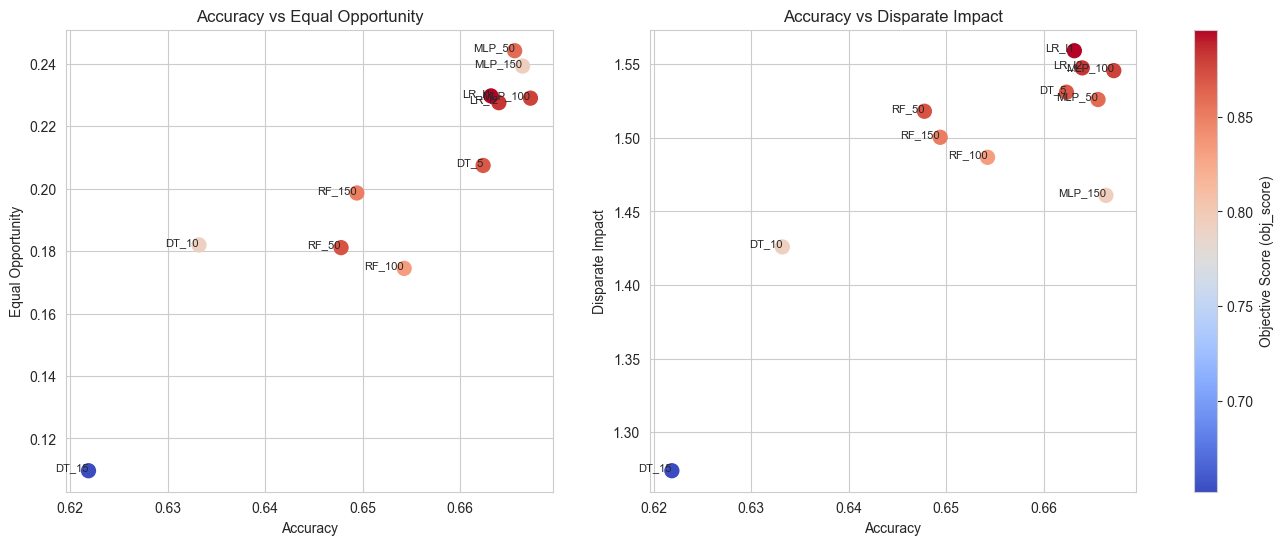

In [28]:
plot_accuracy_vs_bias_with_manual_colorbar(df)

In [37]:
import optuna
from sklearn.metrics import accuracy_score
from holisticai.bias.metrics import disparate_impact

# Define the Objective Function for NAS and HPO
def objective(trial):
    # Define the search space for NAS and HPO
    n_layers = trial.suggest_int("n_layers", 1, 3)  # Number of hidden layers
    hidden_units = trial.suggest_int("hidden_units", 32, 128)  # Units per layer
    dropout_rate = trial.suggest_float("dropout_rate", 0.1, 0.5)  # Dropout rate
    learning_rate = trial.suggest_float("learning_rate", 1e-4, 1e-2, log=True)  # Learning rate
    batch_size = trial.suggest_int("batch_size", 16, 64)  # Batch size
    
    # Build the model dynamically based on the hyperparameters
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))
    for _ in range(n_layers):
        model.add(tf.keras.layers.Dense(hidden_units, activation='relu'))
        model.add(tf.keras.layers.Dropout(dropout_rate))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    
    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train the model
    model.fit(X_train, y_train, epochs=5, batch_size=batch_size, verbose=0)
    
    # Evaluate the model
    y_pred = (model.predict(X_test) > 0.5).astype(int).flatten()
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate fairness metric (e.g., disparate impact)
    fairness = disparate_impact(test['group_a'], test['group_b'], y_pred)
    
    # Multi-objective optimization: maximize accuracy and fairness
    # Optuna minimizes by default; use negative values for maximization
    return -accuracy, -fairness

# Run the Optimization
study = optuna.create_study(directions=["minimize", "minimize"])  # Multi-objective
study.optimize(objective, n_trials=50)

# Analyze the Results
print("Best Trial:")
best_trial = study.best_trial
print(f"Accuracy: {-best_trial.values[0]:.4f}, Fairness: {-best_trial.values[1]:.4f}")
print(f"Hyperparameters: {best_trial.params}")

# Visualize the Pareto Front
import matplotlib.pyplot as plt

trials = study.trials_dataframe()
pareto_front = trials[["values_0", "values_1"]].apply(lambda x: (-x[0], -x[1]), axis=1).values
plt.scatter(pareto_front[:, 0], pareto_front[:, 1], alpha=0.7)
plt.xlabel("Accuracy")
plt.ylabel("Fairness (Disparate Impact)")
plt.title("Pareto Front")
plt.show()


[I 2024-11-23 14:59:49,762] A new study created in memory with name: no-name-8bf01e63-c6ea-4a07-bfb9-38f1e13850f3
[W 2024-11-23 14:59:49,777] Trial 0 failed with parameters: {'n_layers': 3, 'hidden_units': 119, 'dropout_rate': 0.10356664837118434, 'learning_rate': 0.001666024327590004, 'batch_size': 20} because of the following error: NameError("name 'X_train' is not defined").
Traceback (most recent call last):
  File "/Users/rishi/Documents/holistic-hack/holistic-hack/lib/python3.12/site-packages/optuna/study/_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "/var/folders/vh/rp6l70s568gc8_g2c6pn2lnc0000gn/T/ipykernel_29521/984911025.py", line 16, in objective
    model.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))
                                           ^^^^^^^
NameError: name 'X_train' is not defined. Did you mean: 'train'?
[W 2024-11-23 14:59:49,781] Trial 0 failed with value None.


NameError: name 'X_train' is not defined

## Implementation from here

In [62]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from holisticai.datasets import load_dataset
from holisticai.bias.metrics import (disparate_impact, equal_opportunity_diff, statistical_parity)
from holisticai.explainability.metrics.global_feature_importance import alpha_score
from holisticai.robustness.metrics import accuracy_degradation_profile, accuracy_degradation_factor

# Step 1: Load the Dataset
# We will use the COMPAS dataset to establish a baseline

dataset = load_dataset("compas_two_year_recid", protected_attribute="sex")
split_dataset = dataset.train_test_split(test_size=0.2, random_state=42)
train = split_dataset['train']
test = split_dataset['test']

# Step 2: Define Models to Train
# Baseline models without any debiasing or optimization.

models = {
    'LR_l2': LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42),
    'LR_l1': LogisticRegression(penalty='l1', C=1.0, solver='liblinear', random_state=42),
    'RF_50': RandomForestClassifier(n_estimators=50, random_state=42),
    'RF_100': RandomForestClassifier(n_estimators=100, random_state=42),
    'RF_150': RandomForestClassifier(n_estimators=150, random_state=42),
    'DT_5': DecisionTreeClassifier(max_depth=5, random_state=42),
    'DT_10': DecisionTreeClassifier(max_depth=10, random_state=42),
    'DT_15': DecisionTreeClassifier(max_depth=15, random_state=42),
    'MLP_50': MLPClassifier(hidden_layer_sizes=(50,), random_state=42, activation='logistic'),
    'MLP_100': MLPClassifier(hidden_layer_sizes=(100,), random_state=42, activation='logistic'),
    'MLP_150': MLPClassifier(hidden_layer_sizes=(150,), random_state=42, activation='logistic'),
}

# Step 3: Train Models and Collect Baseline Metrics

baseline_results = []

for model_name, model in models.items():
    # Train the model
    model.fit(train['X'], train['y'])
    y_pred = model.predict(test['X'])
    
    # Calculate Metrics
    acc = accuracy_score(test['y'], y_pred)
    di = disparate_impact(test['group_a'], test['group_b'], y_pred)
    eo_diff = equal_opportunity_diff(test['group_a'], test['group_b'], y_pred, test['y'])
    sp_diff = statistical_parity(test['group_a'], test['group_b'], y_pred)
    
    # Record Results
    baseline_results.append({
        'model': model_name,
        'accuracy': acc,
        'disparate_impact': di,
        'equal_opportunity_diff': eo_diff,
        'statistical_parity': sp_diff
    })

# Convert results to a DataFrame for easy comparison
baseline_results_df = pd.DataFrame(baseline_results)

# Display the baseline metrics for each model
print("Baseline Metrics for Each Model:")
baseline_results_df


Baseline Metrics for Each Model:


,model,accuracy,disparate_impact,equal_opportunity_diff,statistical_parity
0,LR_l2,0.663968,1.547523,0.227527,0.141950
1,LR_l1,0.663158,1.559188,0.229697,0.144975
2,RF_50,0.647773,1.518060,0.181116,0.151367
3,RF_100,0.654251,1.486769,0.174465,0.144228
4,RF_150,0.649393,1.500378,0.198613,0.148260
5,DT_5,0.662348,1.530998,0.207432,0.148592
6,DT_10,0.633198,1.425885,0.181974,0.117425
7,DT_15,0.621862,1.273790,0.109676,0.084503
8,MLP_50,0.665587,1.526033,0.244166,0.160191
9,MLP_100,0.667206,1.545661,0.228981,0.159432


In [65]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from holisticai.datasets import load_dataset
from holisticai.bias.metrics import (disparate_impact, equal_opportunity_diff, statistical_parity)
from holisticai.robustness.metrics import accuracy_degradation_profile, accuracy_degradation_factor

# Step 1: Load the Dataset
# We will use the COMPAS dataset to establish a baseline

dataset = load_dataset("compas_two_year_recid", protected_attribute="sex")
split_dataset = dataset.train_test_split(test_size=0.2, random_state=42)
train = split_dataset['train']
test = split_dataset['test']

# Step 2: Define Models to Train
# Baseline models without any debiasing or optimization.

models = {
    'LR_l2': LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42),
    'LR_l1': LogisticRegression(penalty='l1', C=1.0, solver='liblinear', random_state=42),
    'RF_50': RandomForestClassifier(n_estimators=50, random_state=42),
    'RF_100': RandomForestClassifier(n_estimators=100, random_state=42),
    'RF_150': RandomForestClassifier(n_estimators=150, random_state=42),
    'DT_5': DecisionTreeClassifier(max_depth=5, random_state=42),
    'DT_10': DecisionTreeClassifier(max_depth=10, random_state=42),
    'DT_15': DecisionTreeClassifier(max_depth=15, random_state=42),
    'MLP_50': MLPClassifier(hidden_layer_sizes=(50,), random_state=42, activation='logistic'),
    'MLP_100': MLPClassifier(hidden_layer_sizes=(100,), random_state=42, activation='logistic'),
    'MLP_150': MLPClassifier(hidden_layer_sizes=(150,), random_state=42, activation='logistic'),
}

# Step 3: Train Models and Collect Baseline Metrics

baseline_results = []

for model_name, model in models.items():
    # Train the model
    model.fit(train['X'], train['y'])
    y_pred = model.predict(test['X'])
    
    # Calculate Metrics
    acc = accuracy_score(test['y'], y_pred)
    di = disparate_impact(test['group_a'], test['group_b'], y_pred)
    eo_diff = equal_opportunity_diff(test['group_a'], test['group_b'], y_pred, test['y'])
    sp_diff = statistical_parity(test['group_a'], test['group_b'], y_pred)
    
    # Robustness Metrics
    robustness_results = accuracy_degradation_profile(test['X'], test['y'], y_pred, n_neighbors=50, step_size=0.02)
    degradation_factor = accuracy_degradation_factor(pd.DataFrame(robustness_results.data))
    
    # Record Results
    baseline_results.append({
        'model': model_name,
        'accuracy': acc,
        'disparate_impact': di,
        'equal_opportunity_diff': eo_diff,
        'statistical_parity': sp_diff,
        'robustness_degradation_factor': degradation_factor
    })

# Convert results to a DataFrame for easy comparison
baseline_results_df = pd.DataFrame(baseline_results)

# Display the baseline metrics for each model
print("Baseline Metrics for Each Model:")
print(baseline_results_df)


Baseline Metrics for Each Model:
      model  accuracy  disparate_impact  equal_opportunity_diff  \
0     LR_l2  0.663968          1.547523                0.227527   
1     LR_l1  0.663158          1.559188                0.229697   
2     RF_50  0.647773          1.518060                0.181116   
3    RF_100  0.654251          1.486769                0.174465   
4    RF_150  0.649393          1.500378                0.198613   
5      DT_5  0.662348          1.530998                0.207432   
6     DT_10  0.633198          1.425885                0.181974   
7     DT_15  0.621862          1.273790                0.109676   
8    MLP_50  0.665587          1.526033                0.244166   
9   MLP_100  0.667206          1.545661                0.228981   
10  MLP_150  0.666397          1.460904                0.239255   

    statistical_parity  robustness_degradation_factor  
0             0.141950                           0.78  
1             0.144975                           0

In [66]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from holisticai.datasets import load_dataset
from holisticai.bias.metrics import (disparate_impact, equal_opportunity_diff, statistical_parity)
from holisticai.robustness.metrics import accuracy_degradation_profile, accuracy_degradation_factor

# Step 1: Load the Dataset
# We will use the COMPAS dataset to establish a baseline

dataset = load_dataset("compas_two_year_recid", protected_attribute="sex")
split_dataset = dataset.train_test_split(test_size=0.2, random_state=42)
train = split_dataset['train']
test = split_dataset['test']

# Step 2: Define Models to Train
# Baseline models without any debiasing or optimization.

models = {
    'LR_l2': LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42),
    'LR_l1': LogisticRegression(penalty='l1', C=1.0, solver='liblinear', random_state=42),
    'RF_50': RandomForestClassifier(n_estimators=50, random_state=42),
    'RF_100': RandomForestClassifier(n_estimators=100, random_state=42),
    'RF_150': RandomForestClassifier(n_estimators=150, random_state=42),
    'DT_5': DecisionTreeClassifier(max_depth=5, random_state=42),
    'DT_10': DecisionTreeClassifier(max_depth=10, random_state=42),
    'DT_15': DecisionTreeClassifier(max_depth=15, random_state=42),
    'MLP_50': MLPClassifier(hidden_layer_sizes=(50,), random_state=42, activation='logistic'),
    'MLP_100': MLPClassifier(hidden_layer_sizes=(100,), random_state=42, activation='logistic'),
    'MLP_150': MLPClassifier(hidden_layer_sizes=(150,), random_state=42, activation='logistic'),
}

# Step 3: Define Metric Goals
METRIC_GOALS = {
    'accuracy': 0.65,  # Minimum acceptable accuracy
    'disparate_impact_range': (0.8, 1.25),  # Target range for Disparate Impact
    'equal_opportunity_diff': 0.2,  # Maximum acceptable Equal Opportunity Difference
    'statistical_parity': 0.15  # Maximum acceptable Statistical Parity Difference
}

# Step 4: Train Models and Collect Metrics
optimized_results = []

for model_name, model in models.items():
    # Train the model
    model.fit(train['X'], train['y'])
    y_pred = model.predict(test['X'])
    
    # Calculate Metrics
    acc = accuracy_score(test['y'], y_pred)
    di = disparate_impact(test['group_a'], test['group_b'], y_pred)
    eo_diff = equal_opportunity_diff(test['group_a'], test['group_b'], y_pred, test['y'])
    sp_diff = statistical_parity(test['group_a'], test['group_b'], y_pred)
    
    # Robustness Metrics
    robustness_results = accuracy_degradation_profile(test['X'], test['y'], y_pred, n_neighbors=50, step_size=0.02)
    degradation_factor = accuracy_degradation_factor(pd.DataFrame(robustness_results.data))
    
    # Check if goals are met
    goals_met = {
        'accuracy_goal_met': acc >= METRIC_GOALS['accuracy'],
        'disparate_impact_goal_met': METRIC_GOALS['disparate_impact_range'][0] <= di <= METRIC_GOALS['disparate_impact_range'][1],
        'equal_opportunity_goal_met': eo_diff <= METRIC_GOALS['equal_opportunity_diff'],
        'statistical_parity_goal_met': sp_diff <= METRIC_GOALS['statistical_parity']
    }
    
    # Record Results
    optimized_results.append({
        'model': model_name,
        'accuracy': acc,
        'disparate_impact': di,
        'equal_opportunity_diff': eo_diff,
        'statistical_parity': sp_diff,
        'robustness_degradation_factor': degradation_factor,
        **goals_met
    })

# Convert results to a DataFrame for easy comparison
optimized_results_df = pd.DataFrame(optimized_results)

# Display the metrics for each model after evaluation
print("Optimized Metrics for Each Model:")
print(optimized_results_df)

# Compare with Baseline Metrics
comparison_df = pd.merge(baseline_results_df, optimized_results_df, on='model', suffixes=('_baseline', '_optimized'))
print("Comparison of Baseline vs Optimized Metrics:")
print(comparison_df)


Optimized Metrics for Each Model:
      model  accuracy  disparate_impact  equal_opportunity_diff  \
0     LR_l2  0.663968          1.547523                0.227527   
1     LR_l1  0.663158          1.559188                0.229697   
2     RF_50  0.647773          1.518060                0.181116   
3    RF_100  0.654251          1.486769                0.174465   
4    RF_150  0.649393          1.500378                0.198613   
5      DT_5  0.662348          1.530998                0.207432   
6     DT_10  0.633198          1.425885                0.181974   
7     DT_15  0.621862          1.273790                0.109676   
8    MLP_50  0.665587          1.526033                0.244166   
9   MLP_100  0.667206          1.545661                0.228981   
10  MLP_150  0.666397          1.460904                0.239255   

    statistical_parity  robustness_degradation_factor  accuracy_goal_met  \
0             0.141950                           0.78               True   
1        

In [69]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from holisticai.datasets import load_dataset
from holisticai.bias.metrics import (disparate_impact, equal_opportunity_diff, statistical_parity)
from holisticai.robustness.metrics import accuracy_degradation_profile, accuracy_degradation_factor

# Step 1: Load the Dataset
# We will use the COMPAS dataset to establish a baseline

dataset = load_dataset("compas_two_year_recid", protected_attribute="sex")
split_dataset = dataset.train_test_split(test_size=0.2, random_state=42)
train = split_dataset['train']
test = split_dataset['test']

# Step 2: Define Hyperparameter Tuning for Models
# Use GridSearchCV to tune hyperparameters to improve accuracy

param_grids = {
    'LR': {'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear']},
    'RF': {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20]},
    'DT': {'max_depth': [5, 10, 15]},
    'MLP': {'hidden_layer_sizes': [(50,), (100,), (150,)], 'activation': ['logistic', 'relu'], 'learning_rate_init': [0.001, 0.01]}
}

models = {
    'LR': LogisticRegression(random_state=42),
    'RF': RandomForestClassifier(random_state=42),
    'DT': DecisionTreeClassifier(random_state=42),
    'MLP': MLPClassifier(random_state=42)
}

optimized_results = []

# Step 3: Train Models with Hyperparameter Tuning and Collect Metrics
for model_name, model in models.items():
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')
    grid_search.fit(train['X'], train['y'])
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(test['X'])
    
    # Calculate Metrics
    acc = accuracy_score(test['y'], y_pred)
    di = disparate_impact(test['group_a'], test['group_b'], y_pred)
    eo_diff = equal_opportunity_diff(test['group_a'], test['group_b'], y_pred, test['y'])
    sp_diff = statistical_parity(test['group_a'], test['group_b'], y_pred)
    
    # Robustness Metrics
    robustness_results = accuracy_degradation_profile(test['X'], test['y'], y_pred, n_neighbors=50, step_size=0.02)
    degradation_factor = accuracy_degradation_factor(pd.DataFrame(robustness_results.data))
    
    # Check if goals are met
    goals_met = {
        'accuracy_goal_met': acc >= METRIC_GOALS['accuracy'],
        'disparate_impact_goal_met': METRIC_GOALS['disparate_impact_range'][0] <= di <= METRIC_GOALS['disparate_impact_range'][1],
        'equal_opportunity_goal_met': eo_diff <= METRIC_GOALS['equal_opportunity_diff'],
        'statistical_parity_goal_met': sp_diff <= METRIC_GOALS['statistical_parity']
    }
    
    # Record Results
    optimized_results.append({
        'model': model_name,
        'best_params': grid_search.best_params_,
        'accuracy': acc,
        'disparate_impact': di,
        'equal_opportunity_diff': eo_diff,
        'statistical_parity': sp_diff,
        'robustness_degradation_factor': degradation_factor,
        **goals_met
    })

# Convert results to a DataFrame for easy comparison
optimized_results_df = pd.DataFrame(optimized_results)

# Display the metrics for each model after evaluation
print("Optimized Metrics for Each Model:")
print(optimized_results_df)

# Compare with Baseline Metrics
comparison_df = pd.merge(baseline_results_df, optimized_results_df, on='model', suffixes=('_baseline', '_optimized'))
print("Comparison of Baseline vs Optimized Metrics:")
print(comparison_df)


Optimized Metrics for Each Model:
  model                                        best_params  accuracy  \
0    LR   {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}  0.663158   
1    RF             {'max_depth': 10, 'n_estimators': 150}  0.666397   
2    DT                                   {'max_depth': 5}  0.662348   
3   MLP  {'activation': 'logistic', 'hidden_layer_sizes...  0.666397   

   disparate_impact  equal_opportunity_diff  statistical_parity  \
0          1.559188                0.229697            0.144975   
1          1.635698                0.194417            0.162195   
2          1.530998                0.207432            0.148592   
3          1.460904                0.239255            0.157428   

   robustness_degradation_factor  accuracy_goal_met  \
0                           0.76               True   
1                           0.74               True   
2                           0.76               True   
3                           0.76               Tr

In [77]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from holisticai.datasets import load_dataset
from holisticai.bias.metrics import (equal_opportunity_diff)
from tqdm import tqdm
import optuna

# Step 1: Load the Dataset
# We will use the COMPAS dataset to establish a baseline

dataset = load_dataset("compas_two_year_recid", protected_attribute="sex")
split_dataset = dataset.train_test_split(test_size=0.2, random_state=42)
train = split_dataset['train']
test = split_dataset['test']

# Define BaseMetric Class and Custom Metrics
class BaseMetric:
    def __init__(self, model, train, test):
        self.model = model
        self.train = train
        self.test = test

class MyCustomMetric(BaseMetric):
    best_value = 0
    def compute(self):
        y_pred = self.model.predict(self.test['X'])
        acc = accuracy_score(self.test['y'], y_pred)
        eo_diff = equal_opportunity_diff(self.test['group_a'], self.test['group_b'], y_pred, self.test['y'])
        
        # Normalizing metrics to a scale of 0 to 1
        error_accuracy = 1 - acc  # Already between 0 and 1
        error_equal_opportunity = min(1, abs(eo_diff))  # Capped between 0 and 1
        
        # Weights for each metric
        weights = {
            'error_accuracy': 0.9,
            'error_equal_opportunity': 0.1
        }
        
        # Aggregate Error with weights (normalized to be between 0 and 1)
        error = (
            weights['error_accuracy'] * error_accuracy +
            weights['error_equal_opportunity'] * error_equal_opportunity
        )
        return error

class EqualOpportunity(BaseMetric):
    best_value = 0
    def compute(self):
        y_pred = self.model.predict(self.test['X'])
        eo = equal_opportunity_diff(self.test['group_a'], self.test['group_b'], y_pred, self.test['y'])
        return eo

class Accuracy(BaseMetric):
    best_value = 1
    def compute(self):
        y_pred = self.model.predict(self.test['X'])
        acc = accuracy_score(self.test['y'], y_pred)
        return acc

# Define MultiObjectiveOptimizer with Optuna for hyperparameter tuning
class MultiObjectiveOptimizer:
    models = {
        'LR': LogisticRegression(random_state=42),
        'RF': RandomForestClassifier(random_state=42),
        'DT': DecisionTreeClassifier(random_state=42),
        'MLP': MLPClassifier(random_state=42),
        'GB': GradientBoostingClassifier(random_state=42)
    }

    def objective(self, trial, model_name, train, test, metric_evaluation_class, metric_monitor_classes):
        # Suggest hyperparameters using Optuna
        if model_name == 'LR':
            model = LogisticRegression(
                C=trial.suggest_loguniform('C', 0.01, 10),
                penalty='l2',
                solver='liblinear',
                random_state=42
            )
        elif model_name == 'RF':
            model = RandomForestClassifier(
                n_estimators=trial.suggest_int('n_estimators', 50, 200),
                max_depth=trial.suggest_categorical('max_depth', [None, 10, 20]),
                random_state=42
            )
        elif model_name == 'DT':
            model = DecisionTreeClassifier(
                max_depth=trial.suggest_int('max_depth', 3, 15),
                random_state=42
            )
        elif model_name == 'MLP':
            model = MLPClassifier(
                hidden_layer_sizes=trial.suggest_categorical('hidden_layer_sizes', [(50,), (100,), (150,)]),
                activation=trial.suggest_categorical('activation', ['logistic', 'relu']),
                learning_rate_init=trial.suggest_loguniform('learning_rate_init', 0.001, 0.01),
                random_state=42
            )
        elif model_name == 'GB':
            model = GradientBoostingClassifier(
                n_estimators=trial.suggest_int('n_estimators', 50, 150),
                learning_rate=trial.suggest_loguniform('learning_rate', 0.01, 0.2),
                max_depth=trial.suggest_int('max_depth', 3, 7),
                random_state=42
            )
        
        # Fit the model
        model.fit(train['X'], train['y'])
        metric = metric_evaluation_class(model, train, test)
        return metric.compute()

    def optimize(self, train, test, metric_evaluation_class, metric_monitor_classes):
        best_obj_score = np.inf
        history = []

        for model_name in tqdm(self.models.keys()):
            study = optuna.create_study(direction='minimize')
            study.optimize(lambda trial: self.objective(trial, model_name, train, test, metric_evaluation_class, metric_monitor_classes), n_trials=50)
            best_trial = study.best_trial
            
            # Fit the best model with the best parameters
            best_params = best_trial.params
            if model_name == 'LR':
                best_model = LogisticRegression(C=best_params['C'], penalty='l2', solver='liblinear', random_state=42)
            elif model_name == 'RF':
                best_model = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], random_state=42)
            elif model_name == 'DT':
                best_model = DecisionTreeClassifier(max_depth=best_params['max_depth'], random_state=42)
            elif model_name == 'MLP':
                best_model = MLPClassifier(hidden_layer_sizes=best_params['hidden_layer_sizes'], activation=best_params['activation'], learning_rate_init=best_params['learning_rate_init'], random_state=42)
            elif model_name == 'GB':
                best_model = GradientBoostingClassifier(n_estimators=best_params['n_estimators'], learning_rate=best_params['learning_rate'], max_depth=best_params['max_depth'], random_state=42)
            
            best_model.fit(train['X'], train['y'])
            obj_score = self.objective(best_trial, model_name, train, test, metric_evaluation_class, metric_monitor_classes)

            if best_obj_score > obj_score:
                best_obj_score = obj_score
                best_model_name = model_name
                best_model = best_model

            scores = {m.__name__: m(best_model, train, test).compute() for m in metric_monitor_classes}
            history.append({'model': model_name, 'best_params': best_params, 'obj_score': obj_score, **scores})

        return {
            'best_model_name': best_model_name,
            'best_model': best_model,
            'best_obj_score': best_obj_score,
            'history': history
        }

# Initialize and Run the Optimizer
optimizer = MultiObjectiveOptimizer()
metric_evaluation_class = MyCustomMetric
metric_monitor_classes = [EqualOpportunity, Accuracy]
result = optimizer.optimize(train, test, metric_evaluation_class, metric_monitor_classes)

# Convert results to DataFrame and Display
optimized_results_df = pd.DataFrame(result['history'])
print("Optimized Metrics for Each Model:")
print(optimized_results_df)


  0%|          | 0/5 [00:00<?, ?it/s][I 2024-11-23 17:23:11,366] A new study created in memory with name: no-name-6d6e7273-1268-49a4-a500-d99d325e0fa3
[I 2024-11-23 17:23:11,381] Trial 0 finished with value: 0.3294906714475158 and parameters: {'C': 0.035939369693330926}. Best is trial 0 with value: 0.3294906714475158.
[I 2024-11-23 17:23:11,395] Trial 1 finished with value: 0.32612754981061876 and parameters: {'C': 0.2626108321649775}. Best is trial 1 with value: 0.32612754981061876.
[I 2024-11-23 17:23:11,410] Trial 2 finished with value: 0.325181885131651 and parameters: {'C': 2.6205405975847786}. Best is trial 2 with value: 0.325181885131651.
[I 2024-11-23 17:23:11,424] Trial 3 finished with value: 0.325181885131651 and parameters: {'C': 5.311654746725493}. Best is trial 2 with value: 0.325181885131651.
[I 2024-11-23 17:23:11,439] Trial 4 finished with value: 0.32612754981061876 and parameters: {'C': 0.524465049871132}. Best is trial 2 with value: 0.325181885131651.
[I 2024-11-23 17

Optimized Metrics for Each Model:
  model                                        best_params  obj_score  \
0    LR                          {'C': 2.6205405975847786}   0.325182   
1    RF             {'n_estimators': 166, 'max_depth': 10}   0.319902   
2    DT                                   {'max_depth': 3}   0.312519   
3   MLP  {'hidden_layer_sizes': (100,), 'activation': '...   0.311301   
4    GB  {'n_estimators': 145, 'learning_rate': 0.07937...   0.313465   

   EqualOpportunity  Accuracy  
0          0.227527  0.663968  
1          0.196586  0.666397  
2          0.151915  0.669636  
3          0.234464  0.680162  
4          0.226955  0.676923  


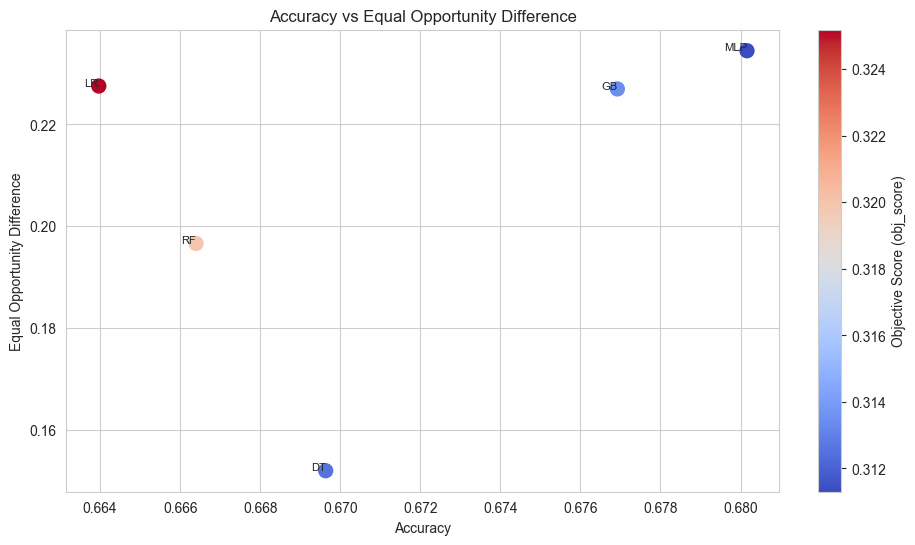

Optimized Metrics for Each Model:
  model                                        best_params  obj_score  \
0    LR                          {'C': 2.6205405975847786}   0.325182   
1    RF             {'n_estimators': 166, 'max_depth': 10}   0.319902   
2    DT                                   {'max_depth': 3}   0.312519   
3   MLP  {'hidden_layer_sizes': (100,), 'activation': '...   0.311301   
4    GB  {'n_estimators': 145, 'learning_rate': 0.07937...   0.313465   

   EqualOpportunity  Accuracy  
0          0.227527  0.663968  
1          0.196586  0.666397  
2          0.151915  0.669636  
3          0.234464  0.680162  
4          0.226955  0.676923  


In [81]:
import matplotlib.pyplot as plt

def plot_accuracy_vs_bias_with_manual_colorbar(df):
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    
    # Scatter plot for Accuracy vs Equal Opportunity Difference
    sc = ax.scatter(df['Accuracy'], df['EqualOpportunity'], 
                    c=df['obj_score'], cmap='coolwarm', s=100)
    ax.set_title('Accuracy vs Equal Opportunity Difference')
    ax.set_xlabel('Accuracy')
    ax.set_ylabel('Equal Opportunity Difference')
    
    # Annotate points with model names
    for i, model in enumerate(df['model']):
        ax.annotate(model, (df['Accuracy'][i], df['EqualOpportunity'][i]), fontsize=8, ha='right')

    # Add a colorbar to indicate the objective score
    cbar = fig.colorbar(sc, ax=ax, orientation='vertical', fraction=0.03)
    cbar.set_label('Objective Score (obj_score)')
    
    plt.show()


plot_accuracy_vs_bias_with_manual_colorbar(optimized_results_df)
print("Optimized Metrics for Each Model:")
print(optimized_results_df)

In [138]:
import numpy as np
from collections import Counter
from holisticai.bias.metrics import average_odds_diff
import pandas as pd
from sklearn.metrics import recall_score, confusion_matrix

class CustomDecisionTreeClassifier:
    def __init__(self, max_depth=5, min_samples_split=2, fairness_weight=0.5):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.fairness_weight = fairness_weight
        self.tree_ = None

    def _calculate_fairness_deviation(self, group_a, group_b, y_pred, y_true):
        """Safe calculation of fairness deviation with error handling"""

       # try:
        return average_odds_diff(group_a, group_b, y_pred, y_true)

    def _calculate_information_gain(self, X, y, groups, feature_idx, threshold):
        left_idxs, right_idxs = self._split(X[:, feature_idx], threshold)
        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0, float('inf')

        parent_entropy = self._entropy(y)
        n = len(y)
        n_left, n_right = len(left_idxs), len(right_idxs)
        entropy_left, entropy_right = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_left / n) * entropy_left + (n_right / n) * entropy_right

        # Calculate fairness metrics safely
        group_a_left = groups[left_idxs] == 0
        group_b_left = groups[left_idxs] == 1
        group_a_right = groups[right_idxs] == 0
        group_b_right = groups[right_idxs] == 1

        # Use the most common label in each split as the prediction
        y_pred_left = np.full_like(y[left_idxs], self._most_common_label(y[left_idxs]))
        y_pred_right = np.full_like(y[right_idxs], self._most_common_label(y[right_idxs]))

        # Calculate fairness deviations safely
        fairness_deviation_left = self._calculate_fairness_deviation(
            group_a_left, group_b_left, y_pred_left, y[left_idxs])
        fairness_deviation_right = self._calculate_fairness_deviation(
            group_a_right, group_b_right, y_pred_right, y[right_idxs])

        # Average the fairness deviations
        fairness_deviation = (fairness_deviation_left + fairness_deviation_right) / 2

        information_gain = parent_entropy - child_entropy
        return information_gain, fairness_deviation

    def fit(self, X, y, groups):
        if isinstance(X, pd.DataFrame):
            X = X.values
        if isinstance(y, pd.Series):
            y = y.values
        if isinstance(groups, pd.Series):
            groups = groups.values
        self.tree_ = self._grow_tree(X, y, groups, depth=0)

    # Rest of the CustomDecisionTreeClassifier methods remain the same...
    def _grow_tree(self, X, y, groups, depth):
        num_samples, num_features = X.shape
        if (depth >= self.max_depth or num_samples < self.min_samples_split or len(set(y)) == 1):
            return {'label': self._most_common_label(y)}

        best_split = self._find_best_split(X, y, groups)
        if not best_split:
            return {'label': self._most_common_label(y)}

        left_idxs, right_idxs = self._split(X[:, best_split['feature_idx']], best_split['threshold'])

        left_subtree = self._grow_tree(X[left_idxs], y[left_idxs], groups[left_idxs], depth + 1)
        right_subtree = self._grow_tree(X[right_idxs], y[right_idxs], groups[right_idxs], depth + 1)

        return {'feature_idx': best_split['feature_idx'], 'threshold': best_split['threshold'],
                'left': left_subtree, 'right': right_subtree}

    def _find_best_split(self, X, y, groups):
        num_samples, num_features = X.shape
        best_split = {}
        best_gain = -float('inf')

        for feature_idx in range(num_features):
            thresholds = np.unique(X[:, feature_idx])
            for threshold in thresholds:
                gain, fairness_deviation = self._calculate_information_gain(X, y, groups, feature_idx, threshold)
                
                fairness_penalty = self.fairness_weight * fairness_deviation
                print(f"fairness pen: {fairness_penalty}")
                adjusted_gain = gain - fairness_penalty

                if adjusted_gain > best_gain:
                    best_gain = adjusted_gain
                    best_split = {'feature_idx': feature_idx, 'threshold': threshold}

        return best_split if best_gain != -float('inf') else None

    def _split(self, feature_column, threshold):
        left_idxs = np.argwhere(feature_column <= threshold).flatten()
        right_idxs = np.argwhere(feature_column > threshold).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log2(p) for p in ps if p > 0])

    def _most_common_label(self, y):
        return Counter(y).most_common(1)[0][0]

    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.values
        return np.array([self._traverse_tree(x, self.tree_) for x in X])

    def _traverse_tree(self, x, node):
        if 'label' in node:
            return node['label']
        if x[node['feature_idx']] <= node['threshold']:
            return self._traverse_tree(x, node['left'])
        return self._traverse_tree(x, node['right'])

class CustomRandomForestClassifier:
    def __init__(self, n_estimators=10, max_depth=5, min_samples_split=2, fairness_weight=0.5, random_state=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.fairness_weight = fairness_weight
        self.random_state = random_state
        self.trees = []

    def fit(self, X, y, groups):
        if isinstance(X, pd.DataFrame):
            X = X.values
        if isinstance(y, pd.Series):
            y = y.values
        if isinstance(groups, pd.Series):
            groups = groups.values

        if self.random_state is not None:
            np.random.seed(self.random_state)
        
        self.trees = []
        for _ in range(self.n_estimators):
            idxs = np.random.choice(len(X), len(X), replace=True)
            X_sample, y_sample = X[idxs], y[idxs]
            group_sample = groups[idxs]

            tree = CustomDecisionTreeClassifier(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split,
                fairness_weight=self.fairness_weight
            )
            tree.fit(X_sample, y_sample, group_sample)
            self.trees.append(tree)

    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.values
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        return np.round(tree_preds.mean(axis=0)).astype(int)
    
# Example usage
X = train['X']
y = train['y']
groups = np.where(train['p_attrs']["sex"].to_numpy() == "Male", 1, 0)

# Create and fit the model
clf = CustomRandomForestClassifier(
    n_estimators=3,
    max_depth=3,
    fairness_weight=0.0,
    random_state=42
)
clf.fit(X, y, groups)

# Make predictions
predictions = clf.predict(test['X'])


fairness pen: 0.0
fairness pen: 0.0
fairness pen: 0.0
fairness pen: 0.0
fairness pen: 0.0
fairness pen: 0.0
fairness pen: 0.0
fairness pen: 0.0
fairness pen: 0.0
fairness pen: 0.0
fairness pen: 0.0
fairness pen: 0.0
fairness pen: 0.0
fairness pen: 0.0
fairness pen: 0.0
fairness pen: 0.0


IndexError: index 1 is out of bounds for axis 0 with size 1

In [133]:
np.count_nonzero(predictions == test['y'])/len(test['y'])

0.6696356275303643

In [134]:
print(equal_opportunity_diff(test['group_a'], test['group_b'], predictions, test['y']))
print(average_odds_diff(test['group_a'], test['group_b'], predictions, test['y']))

0.19224809897261091
0.1142130573166157
